## Описание проекта и данных

Кредитному отделу банка необходимо разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Проект "Исследование надежности заемщиков"

### Описание данных

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита


### Инструкция по выполнению

**Загрузка и изучение данных**

Загрузите файл `scoring_data.csv` и изучите общую информацию о данных.

**Предобработка данных**
1.	В двух столбцах есть пропущенные значения, найдите их и заполните медианным значением по столбцу. Оцените, какую долю составляют пропущенные значения в каждом из столбцов с пропусками и объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.
2. Замените вещественный тип данных в столбце `total_income` на целочисленный. Используйте, например, метод `astype()`.
3. Проверьте, присутствуют ли в данных строки-дубликаты. Удалите их при обнаружении. Обработайте неявные дубликаты. В столбце `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к одному регистру. Проверьте остальные столбцы.
4. Обработайте значения в столбцах с аномалиями и укажите возможные причины появления таких данных. Например, отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально.
5.	На основании диапазонов, указанных ниже, создайте столбец `total_income_category` с категориями:
*	0–30000 — 'E';
*	30001–50000 — 'D';
*	50001–200000 — 'C';
*	200001–1000000 — 'B';
*	1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

6.	Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:
* `операции с автомобилем`,
* `операции с недвижимостью`,
* `проведение свадьбы`,
* `получение образования`.

Например, если в столбце `purpose` находится подстрока `на покупку автомобиля`, то в столбце `purpose_category` должна появиться строка `операции с автомобилем`.

Напишите собственную функцию и используйте метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.

**Выводы**

Ответьте на следующие вопросы.
*	Есть ли зависимость между количеством детей и возвратом кредита в срок?
*	Есть ли зависимость между семейным положением и возвратом кредита в срок?
*	Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*	Как разные цели кредита влияют на его возврат в срок?

Результаты представьте в виде таблиц и графиков.

## Изучение общей информации о данных


In [ ]:
# импорт библиотек pandas, numpy, seaborn и matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Обычно данные хранятся в файле, которую нужно привести к виду таблицы.
Чаще всего вы будете работать с файлами `.csv` (англ. `Comma-Separated Values`, «значения, разделённые запятой»). Часто такие файлы с данными называют датасетами.

Для чтения файла используют метод `read_csv()`. В качестве аргумента он принимает путь к файлу. Путь к файлу — строка с именем файла и каталогами, в которые он вложен.

Например, прочитаем файл `file_name.csv` и перенесем данные из файла в датафрейм с именем `df`:

`df = pd.read_csv('file_name.csv')`.

In [ ]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('scoring_data.csv')

except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/My Drive/scoring_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Для того, чтобы выводить не весь DataFrame, а только часть, можно использовать следующие приемы:

* Вывод первых 5 строк - `df.head()`
* Вывод последних 5 строк - `df.tail()`
* Вывод 5 случайных строк - `df.sample(5)`

Полезные методы, которые вы можете использовать, для того, чтобы посмотреть на размер данных, названия признаков и их типы:

* `df.shape` - покаывает размер датафрейма

* `df.columns` - показывает названия признаков (столбцов)

* `df.dtypes` - показывает информацию о типах данных

* `df.info()` - показывает информацию о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти.

* `df.describe()` - показывает количество строк в столбце, среднее значение столбца, столбец стандартное отклонение , минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%. Любые значения `NaN` автоматически пропускаются. По умолчанию, метод `describe( )` пропускает строки и столбцы не содержащие чисел - категориальные признаки. Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include = 'all'`, чтоб вывести статистику по всем имеющимся признакам.


In [ ]:
# получение первых 5 строк таблицы df
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов по 21525 записей. Тип данных в столбцах соответствуют хранящимся в них данных.

В названиях колонок нарушений стиля не обнаружено. Переименовывать столбцы нет необходимости.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы — данные о заемщиках банка. Часть колонок описывает клиента: общий трудовой стаж, возраст, уровень образования, семейное положение, пол, тип занятости, ежемесячный доход. Столбцы `education_id` и `family_status_id` выполняют роль перевода качественной характеристики заемщика в количественную, т.е. ставят в соответствие статусу семейного положения и уровня образования метку. Поэтому в целом можно сказать, что данные столбцов `education` и `family_status` продублированы в соответствии с их количественными идентификаторами и могут быть удалены из датасета из-за отсутствия информативности.
Столбцы `debt` и `purpose` характеризуют клиента относительно процедуры кредитования, учитывают его кредитную историю.

Устраним проблемы в данных.

## Предобработка данных

### Пропуски


Для обнаружения недостающих данных используют методы `isnull()` и `notnull()`.

Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

Например, `df.isnull().sum()` сформирует сводную таблицу с названием столбца таблицы и количеством пропущенных записей в этом столбце.

In [ ]:
# подсчёт пропусков
df.isnull().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

В столбцах `days_employed` и `total_income` имеются одинаковое количество пропущенных значений. Оба столбца - количественные, поэтому пропуски логично заполнить числовыми значениями.


Пропуски составляют 10% от объема данных в соответствующих столбцах, удалять такое не следует, достаточный объем данных для изменения основных характеристик.

Возможно, пропуски связаны с отсутствием занятости клиента, поэтому у него нет среднего дохода и стажа работы. Это вполне логично. Т.к. доля пропущенных значений невелика, то это не сильно повлияет на итоговый результат. Но эти пропуски могут быть связаны либо с отсутствием информации по этим пунктам, либо просто с отсутствием постоянного дохода и места работы заемщика.  Но в столбце `income_type` пропусков нет. Поэтому есть предположение, что сотрудники банка просто не внесли данную информацию при заполнении анкеты.

Для заполнения пропусков в данных используют метод `fillna(value=None, method=None)`.

Он заменяет все значения `NaN` на одно и то же новое значение, которое передается как аргумент функции (`value= 5` заменит все пропущенные значения на 5).

Стратегия заполнения - аргумент `method= ‘backfill’, ‘bfill’, ‘ffill’` - заполнение значениями из предшествующей (аргумент `method='bfill'`) либо последующей записи (`method='ffill'`)


In [ ]:
# Заменим пропущенные значения медианными значениями по соответствующим столбцам
df['days_employed'].fillna(df['days_employed'].median(), inplace=True)
df['total_income'].fillna(df['total_income'].median(), inplace=True)
# проверка заполненности пропусков
df.isnull().mean()


children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

### Изменение типа данных


Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [ ]:
df['total_income']=df['total_income'].astype('int')
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int64
purpose              object
dtype: object

### Дубликаты

Для обнаружения явных дубликатов используют метод `duplicated()`.


Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

Например, `df.duplicated().sum()` определит общее количество дублирующих записей во всем датасете.

In [ ]:
# подсчёт явных дубликатов
df.duplicated().sum()

54

Для удаления строк-дубликатов используют метод `drop_duplicates()`. Обратите внимание, что этот метод не меняет исходный датафрейм.

In [ ]:
# удаление явных дубликатов (с удалением старых индексов и формирование новых)
df=df.drop_duplicates().reset_index(drop=True)

# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Определим все уникальные записи в столбце `education`. Для этого используют метод `unique()`.

Метод `sort_values()` выполняет сортировку данных в порядке возрастания. Если необходимо изменить порядок сортировки, то в качестве аргумента метода `sort_values()` следует указать `ascending=False`.

In [ ]:
# Выведем на экран список уникальных названий education, отсортированный в алфавитном порядке
df['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

Видим, что названия записаны в разном регистре, поэтому переведем все записи в нижний регистр для устрания неявных дубликатов и выведем полученный список уникальных значений.

Для перевода записей в нижний регистр используют метод `lower()`. Метод `str.lower()` вернет копию строки `str`, в которой все символы будут преобразованы в нижний регистр.

* Для преобразования строки в верхний регистр используйте метод строки `str.upper()`.
* Для того, что бы каждое слово в строке начиналось с заглавной буквы используйте метод `str.title()`.

In [ ]:
df['education']=df['education'].str.lower()

После записи в нижнем регистре все неявные дубликаты устранены. Проверим, появились ли после такой замены дубликаты в явном виде. Снова применим метод `duplicated()`

In [ ]:
# проверка на количество дубликатов
df.duplicated().sum()

17

In [ ]:
#Дубли остались, поэтому удалим эти явные дубликаты (с удалением старых индексов и формированием новых)
df=df.drop_duplicates().reset_index(drop=True)
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [ ]:
# Выведем на экран список уникальных названий family_status, отсортированный в алфавитном порядке
df['family_status'].sort_values().unique()
df['family_status'].value_counts()

family_status
женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: count, dtype: int64

В столбце `family_status` неявных дубликатов не обнаружено.

In [ ]:
# Выведем на экран список уникальных названий income_type, отсортированный в алфавитном порядке
df['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

В столбце `income_type` неявных дубликатов не обнаружено.

In [ ]:
# Выведем на экран список уникальных названий purpose, отсортированный в алфавитном порядке
df['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

Многие записи дублируют друг друга, но имеют различную формулировку. Скорее всего, наличие такого большого количества различных записей связано со свободной формой заполнения соответствующих данных и отсутствием единого формата.



Таким образом, все неявные дубликаты устранены либо записью в нижнем регистре, либо заменой дублирующих значений. Наличие большого количества дубликатов связано с отсутствием единой формы записи. Каждый оператор при внесении соответствующих сведений полагается на собственный опыт, интуицию и способности. Пропусков не осталось. Явные дубликаты устранены.

### Аномальные значения

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. Вычислить их можно методами `mean()` и `median()`.

Однако, помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего и насколько их много.

Самое простое, что можно посчитать для оценки разброса, — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

Квартили (от лат. `quartus` — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль `Q1` — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль `Q2`, половина элементов больше и половина меньше неё. Третий квартиль `Q3` — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него.

Межквартильный размах — это расстояние между `Q1` и `Q3`.

Увидеть медиану и квартили в `Python` можно на специальном графике. Его называют диаграммой размаха или «ящиком с усами».

![image-2.png](attachment:image-2.png)

«Ящик» ограничен первым и третьим квартилями.

Внутри ящика обозначают медиану.

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо `IQR`, от англ. `interquartile range`, «межквартильный размах»).

В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».


![image.png](attachment:image.png)

В `Python` диаграмму размаха строят методом `boxplot()` (от англ. `box-and-whisker plot` — «график „ящик с усами“»). Длину "усов" можно контрольровать параметром `whis`.

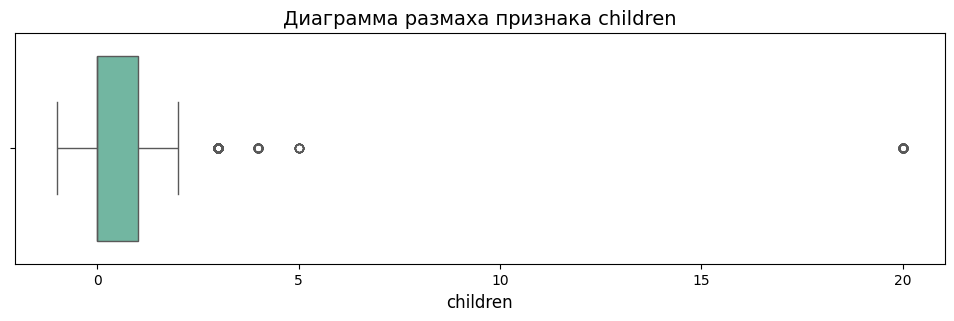

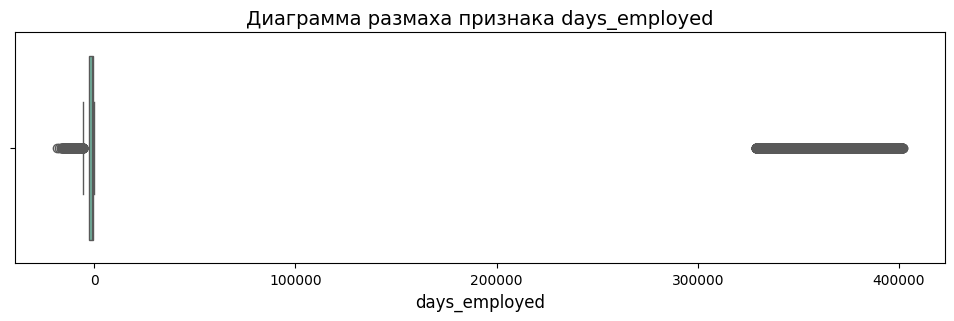

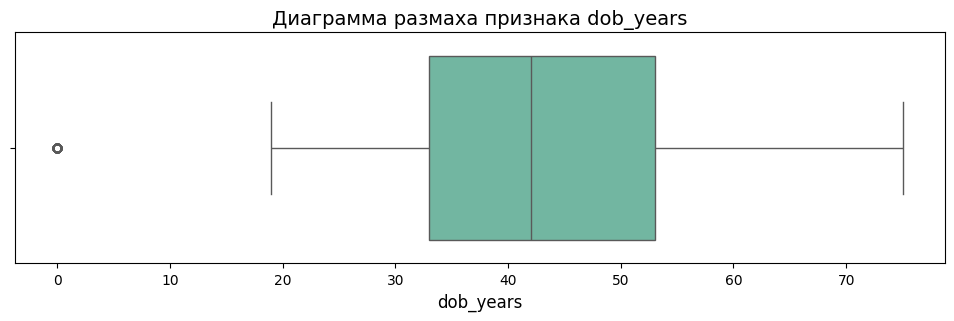

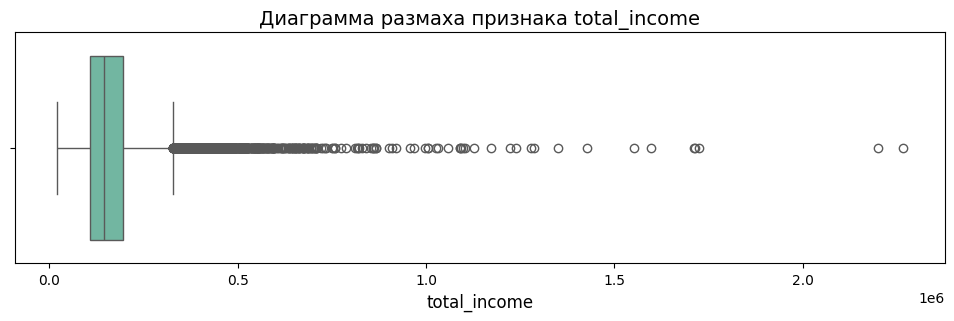

In [ ]:
sns.set_palette('Set2')
for name in ['children', 'days_employed', 'dob_years', 'total_income']:
    fig = plt.figure(figsize = (12,3))
    plt.title(f"Диаграмма размаха признака "+name, fontsize=14)
    sns.boxplot(x=df[name])

    plt.xlabel(name, fontsize = 12)
    plt.show()

Изобразим диаграммы размаха методом `violinplot()` (англ. «график-скрипка»).

Как и `boxplot()`, этот график характеризует форму распределения. Необычный внешний вид получается из-за сложения двух графиков плотности распределения.

Основное преимущество перед `boxplot()` — возможность изучить распределение и установить его тип.

![image.png](attachment:image.png)

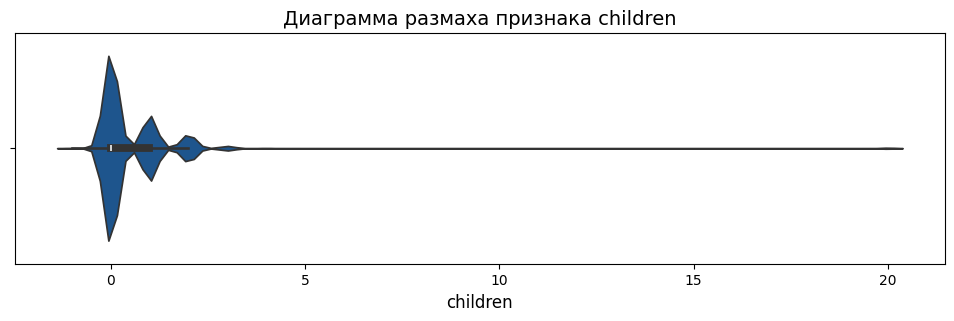

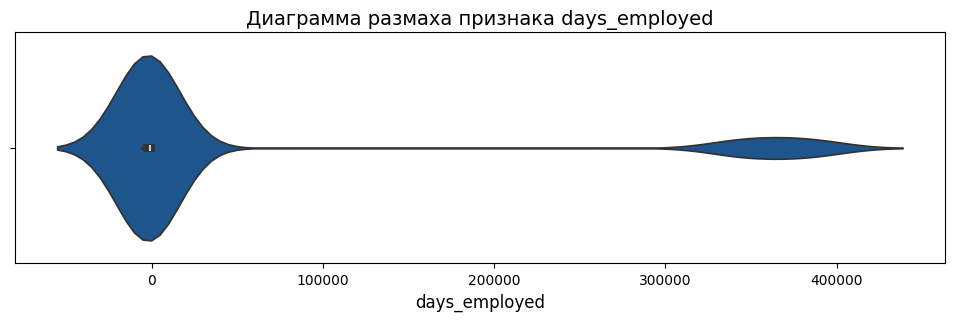

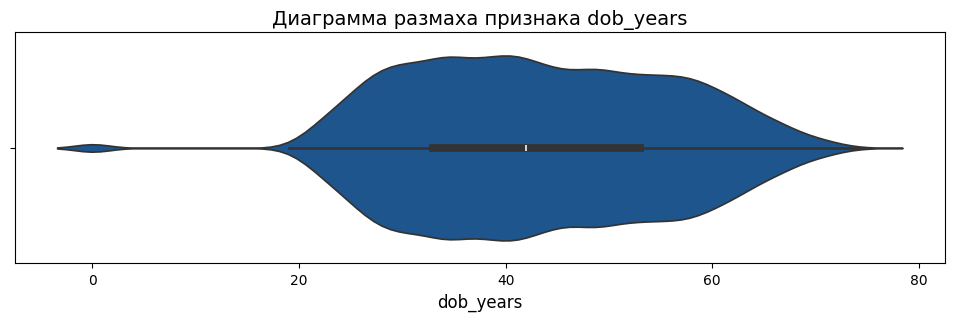

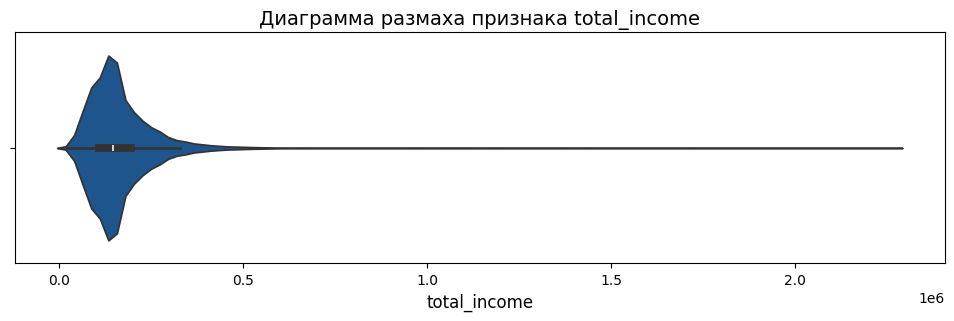

In [ ]:
sns.set_palette('Blues_r')
for name in ['children', 'days_employed', 'dob_years', 'total_income']:
    fig = plt.figure(figsize = (12,3))
    plt.title(f"Диаграмма размаха признака "+name, fontsize=14)
    sns.violinplot(x=df[name])

    plt.xlabel(name, fontsize = 12)
    plt.show()

Оценим статистические характеристики числовых признаков.

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В `Python` его получают методом `describe()` (пер. «описать, охарактеризовать»). Результат работы метода — список характерных значений.

Правильно истолковать значения на диаграмме размаха трудно. Можно сравнить числовое описание, которое выдаёт метод `describe()`, с диаграммой размаха. Так вы графически отобразите распределение данных и зафиксируете важные значения в числах. Обратите внимание, что значения 25% и 75% в выдаче метода `describe()` — это `Q1` и `Q3` соответственно.

In [ ]:
# Выведем описательную статистику и проанализируем полученные результаты
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,2.145400e+04
mean,0.539946,56748.489332,43.271231,0.817097,0.973898,0.081150,1.652256e+05
std,1.383444,135104.409125,12.570822,0.548674,1.421567,0.273072,9.802102e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,-2523.810846,33.000000,1.000000,0.000000,0.000000,1.076230e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450170e+05
75%,1.000000,-382.445814,53.000000,1.000000,1.000000,0.000000,1.958132e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Среднее число отработанных дней(стаж работы) составляет 56557.34 дней, что соответствет 154.95 года. При этом минимальное значение отрицательно, чего не может быть. Возможно, при внесении данной информации была допущена ошибка по невнимательности. Выясним, сколько таких отрицательных значений.

In [ ]:
df[df['days_employed']<0]
df[df['days_employed']<0].shape[0]/df.shape[0]

0.8394238836580591

Всего отрицательных значений в столбце `days_employed` имеется 18009, что составляет 83.9%. Это очень много. Удалить эти данные нецелесообразно, т.к. их слишком много. Скорее всего, это ошибка оператора. Заменим отрицательные значения на их абсолютные значения.

In [ ]:
df['days_employed']=df['days_employed'].abs()
df[df['days_employed']<0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Следующее непонятное значение - минимальное количество детей = -1, максимальное количество детей = 20. По поводу значения -1 есть подозрение, что это опечатка. Касательно 20 детей - всё может быть. Это может быть семья с приемными детьми. Выясним, какие значения имеются для количества детей в семье.

Определим количество записей каждого класса. Для этого используем метод `value_counts`, который выполняет группировку данных по указанному столбцу и подсчитывает количество записей каждого значения. Если в качестве параметра указать `normalize=True`, то метод произведет вычисление значений с долевом отношении.

In [ ]:
#  Выведем весь список значений столбца children
df['children'].value_counts(normalize=True)

children
 0     0.656801
 1     0.224107
 2     0.095646
 3     0.015382
 20    0.003542
-1     0.002191
 4     0.001911
 5     0.000420
Name: proportion, dtype: float64

Количество отрицательных значений невелико (около 0.2%), поэтому все значения `children` = -1 удалим из датасета.

Касательно значения `children` = 20 есть сомнения. Т.к. это следующее после `children` = 5 значение, то есть подозрение, что это должны быть значения `children` = 2. Т.к. достоверно неизвестно, с чем связана эта "ошибка", то будем считать, что это ошибка записи. Количество значений `children` = 20 невелико (около 0.35%), поэтому все значения `children` = 20 удалим из датасета.


In [ ]:
# Удалим из датасета некорректные значения, т.к. их доля мала
df=df.query('children >=0 and children !=20')


In [ ]:
#  Выведем весь сгруппированный список значений столбца children
df['children'].value_counts(normalize=True) # inplays делает перезапись в датасете чтобы инфа сохранилась


children
0    0.660588
1    0.225400
2    0.096198
3    0.015470
4    0.001922
5    0.000422
Name: proportion, dtype: float64

In [ ]:
# Снова выведем описательную статистику и проверим выполненные замены
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,21331.000000,2.133100e+04
mean,0.474005,60575.173660,43.277952,0.816980,0.974497,0.081196,1.652494e+05
std,0.752378,133577.260770,12.575300,0.549282,1.421787,0.273143,9.814797e+04
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.737321,33.000000,1.000000,0.000000,0.000000,1.075070e+05
50%,0.000000,1823.771136,42.000000,1.000000,0.000000,0.000000,1.450170e+05
75%,1.000000,4808.339082,53.000000,1.000000,1.000000,0.000000,1.958315e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [ ]:
df.describe(include='object')

,education,family_status,gender,income_type,purpose
count,21331,21331,21331,21331,21331
unique,5,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,15075,12261,14092,11015,790


In [ ]:
# Выведем на экран список уникальных значений пола клиента (gender)
df['gender'].value_counts()

gender
F      14092
M       7238
XNA        1
Name: count, dtype: int64

In [ ]:
df.query('gender !="XNA"' , inplace=True)


In [ ]:
# Удалим из датасета некорректные значения, т.к. их доля мала


### Создание категорий


На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:
*	0–30000 — 'E';
*	30001–50000 — 'D';
*	50001–200000 — 'C';
*	200001–1000000 — 'B';
*	1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [ ]:
# Функция income_group для возврата номера категории дохода клиента

def income_group(income):
  if income<=30000:
    return 'E'
  if income<50000:
    return 'D'
  if income<200000:
    return 'c'
  if income<1000000:
    return 'B'
  else:
    return 'A'

In [ ]:
# применим функцию к столбцу total_income и уточним категорию среднего дохода заемщика.
#Добавим соответствующий столбец в таблицу
# Используем метод apply
df['total_income_category ']=df['total_income'].apply(income_group)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,c
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,c
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,c


### Создание функции для категоризации данных


In [ ]:
# Выведем на экран список уникальных названий purpose, отсортированный в алфавитном порядке
df['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

In [ ]:
# Функция purpose_group для возврата короткой формы целей кредитования
def purpose_group(purposes):
  if 'автомоб' in purposes:
    return 'операции с автомобилем'
  if 'образова' in purposes:
    return 'получение образования'
  if 'свадьб' in purposes:
    return 'проведение свадьбы'
  else:
    return 'операции с недвижимостью'

In [ ]:
# применим функцию к столбцу purpose и уточним категорию указанных целей кредитования.
# Добавим соответствующий столбец в таблицу и выведем первые 5 строк
df['purpose_category']=df['purpose'].apply(purpose_group)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,c,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,c,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,c,проведение свадьбы


## Выводы


Ответим на вопросы
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
*	Есть ли зависимость между семейным положением и возвратом кредита в срок?
*	Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*	Как разные цели кредита влияют на его возврат в срок?


Для формирования сравнительных таблиц можно использовать метод `groupby`. Операция группировки включает в себя некоторую комбинацию разделения объекта, применения функции и объединения результатов. Это можно использовать для группировки больших объемов данных и выполнения операций над этими группами.

**Связь между кредитами и количеством детей**

Для отображения изменений — по времени или категориям — удобно использовать линейный график. Заранее сгруппируем данные и сформируем необходимую таблицу. Стиль графика назначим средствами библиотеки `seaborn`.

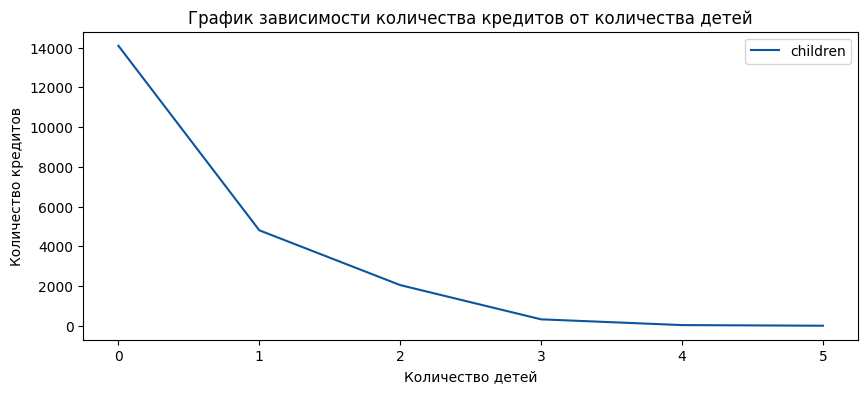

In [ ]:
# готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = df.groupby('children')[['children']].count()

# назначаем размер графика
plt.figure(figsize=(10, 4))

# строим линейный график средствами seaborn
sns.lineplot(data=data_ch)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
# отображаем график на экране
plt.show()

График получился достаточно наглядным: видно, как падает число выданных кредитов в зависимости от числа детей в семье заёмщика. Возможно, это не связано с тем, что многодетные семьи реже берут кредиты. Cемей без детей или с 1–2 детьми намного больше, чем многодетных. В таком случае стоит рассматривать относительные величины.

Сформируем таблицу, отражающую количество выданных кредитов и долю из возвратов в зависимости от количества детей.

Для этого используем метод `groupby`. В качестве агрегирующих функций используем `count` (вычисляет количество записей), `sum` (вычисляет сумму значений, но т.к. наши значения бинарные, то сумма единиц покажет количество дефолтных кредитов) и `mean` (вычисляет среднее значений, но т.к. наши значения бинарные, то среднее покажет долю дефолтных кредитов).

In [ ]:
df.groupby('children')['debt'].agg(['count','sum','mean'])

,count,sum,mean
children,,,
0,14090,1063,0.075444
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Можем при формировании таблицы сразу задать названия столбцов

In [ ]:
df_pivot=df.groupby('children')['debt'].agg(total_userd='count', debt='sum', debt_share='mean').reset_index()
df_pivot['user_share']=df_pivot['total_userd']/df_pivot['total_userd'].sum()
df_pivot.style.format({'debt_share':'{:.1%}','user_share':'{:.1%}'})

,children,total_userd,debt,debt_share,user_share
0,0,14090,1063,7.5%,66.1%
1,1,4808,444,9.2%,22.5%
2,2,2052,194,9.5%,9.6%
3,3,330,27,8.2%,1.5%
4,4,41,4,9.8%,0.2%
5,5,9,0,0.0%,0.0%


Оформим результат такой группировки по столбцу и вычисление доли дефолтных кредитов в виде функции `get_share`, которая на вход принимает датафрейм, столбец для группировки, а столбец `debt` для аггрегации значений укажем по умолчанию. Возвращать функция должна таблицу результатов, отражающую значения столбца, по которому выполнялась группировка, количество выданных кредитов, количество дефолтных среди них, долю дефолтных кредитов и долю кредитов в общем числе выданных.

In [ ]:
def get_share(df, column, column_to_cal = 'debt'):
    result = df.groupby(column)[column_to_cal].agg(total_users ='count', debts = 'sum', debt_share ='mean').reset_index()
    result['users_share'] = result['total_users']/result['total_users'].sum()
    result

    return result.style.format({'debt_share': '{:.1%}',
                                        'users_share': '{:.1%}'})

Применим функцию `get_share` к столбцу `children` датасета `df`.

In [ ]:
get_share(df,'children')

,children,total_users,debts,debt_share,users_share
0,0,14090,1063,7.5%,66.1%
1,1,4808,444,9.2%,22.5%
2,2,2052,194,9.5%,9.6%
3,3,330,27,8.2%,1.5%
4,4,41,4,9.8%,0.2%
5,5,9,0,0.0%,0.0%


Число выданных кредитов для заемщиков без детей составляет 14090, из которых 1063 имеют просрочку. Доля невозврата кредита для заемщиков без детей составляет 7.5%. Для заемщиков с одним ребенком - 9.2%, с двумя детьми - 9.5%, с тремя детьми - 8.2%, для заемщиков с 4-мя детьми доля невозврата составила 9.8%. Можно сказать, что количество детей не влияет на возврат кредита в срок.

In [ ]:
# Сгруппируем данные по столбцу children и выведем на экран общее количество
# задаем датасет и столбец по которому будем считать, еще задаем сам признак (debt) по умолчанию:
def debt_share(df, column, column_to_cal = 'debt'):
    result = (df
         .groupby(column, as_index=False)

         # обратите внимание, что мы можем сразу задать название колонок:
         .agg(total_users = (column_to_cal,'count'),
              debts = (column_to_cal,'sum'),
              debt_share = (column_to_cal,'mean'))
              .assign(users_share = lambda x: x['total_users']/x['total_users'].sum())
         .sort_values(by=('debt_share'), ascending=False)
            )

    return result.style.format({'debt_share': '{:.1%}',
                                              'users_share': '{:.1%}'})



In [ ]:
#Теперь используем дополнительные стили для вывода данных:
debt_share(df,'children')

,children,total_users,debts,debt_share,users_share
4,4,41,4,9.8%,0.2%
2,2,2052,194,9.5%,9.6%
1,1,4808,444,9.2%,22.5%
3,3,330,27,8.2%,1.5%
0,0,14090,1063,7.5%,66.1%
5,5,9,0,0.0%,0.0%


**Связь между кредитами и семейным положением**

In [ ]:
# Применим функцию get_share к столбцу family_status
get_share(df,'family_status')

,family_status,total_users,debts,debt_share,users_share
0,Не женат / не замужем,2796,273,9.8%,13.1%
1,в разводе,1189,84,7.1%,5.6%
2,вдовец / вдова,951,63,6.6%,4.5%
3,гражданский брак,4133,385,9.3%,19.4%
4,женат / замужем,12261,927,7.6%,57.5%


Наибольшее количество кредитов выдано женатым/замужним заемщикам. Доля возврата кредита в срок для всех категорий примерно одинаковая.
Для заемщиков в статусе вдова/вдовец доля возврата кредита в срок наибольшая , хотя кредитов таким заемщикам выдано наименьшее количество.

Наименьшую долю возврата кредита в срок имеют заемщики в статусе гражданский брак и Не женат / не замужем.

Поэтому можно сказать, что наименее ответвенными заемщиками можно считать заемщиков, состоящих в гражданском браке, или не женатых/ не замужних.

**Распределение доходов должников и ответственных заёмщиков**

Сравним доход у должников и ответственных заёмщиков. Построим «график-скрипку» методом `violinplot()` из библиотеки `seaborn`. Такой график включает все параметры, которые показывает «ящик с усами», и отображает форму гистограммы.

In [ ]:
# # строим график violinplot средствами seaborn
# sns.violinplot(x='total_income', y='debt', data=df)
# # ограничиваем ось X для наглядности
# plt.xlim(0, 500000)
# # указываем заголовок графика и подписи осей средствами matplotlib
# plt.title('Распределение дохода в зависимости от наличия задолженности')
# plt.xlabel('Значение дохода')
# plt.ylabel(None)
# # отображаем график на экране
# plt.show()

Ответим на вопрос об изменении доходов. Распределение лучше всего смотреть на гистограмме. В библиотеке seaborn есть подходящий метод — `histplot()`.

Напомним, что `seaborn` — это надстройка над `matplotlib`, поэтому инструменты этих двух библиотек можно комбинировать. Для настройки стиля графика и некоторых других параметров будем использовать `matplotlib`, а сам график построим с помощью `seaborn`.

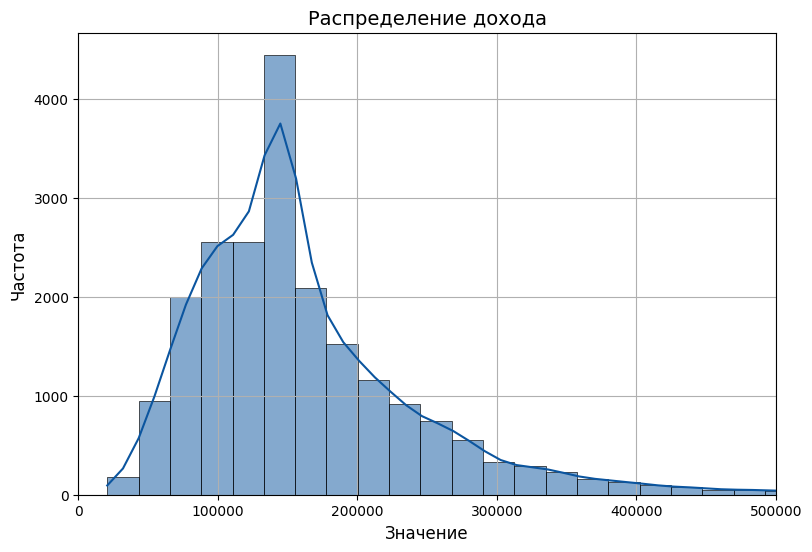

In [ ]:
# назначаем размер графика
plt.figure(figsize=(9, 6))

# строим гистограмму для столбца total_income, добавив график кривой KDE
sns.histplot(x=df['total_income'],kde=True,bins=100)

# ограничиваем ось X для наглядности
plt.xlim(0, 500000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

In [ ]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,c,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,c,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,c,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,c,операции с автомобилем
21451,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,c,операции с недвижимостью
21452,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


In [ ]:
# Применим функцию get_share к столбцу total_income_category
get_share(df, 'total_income_category')

KeyError: 'total_income_category'

Наибольшее количество кредитов выдано заемщикам со средним доходом от 50001 до 200000 (категория С). Доля невозврата кредита в срок для этой категории составила 8.5%. Для заемщиков с высоким доходом 1000001 и выше (категория E)  выдано всего 25 кредитов и только 2 не возвращены в срок. Для заемщиков с доходами от 30001 до 50000 (категория D) доля возврата кредита в срок самая высокая и составляет 94.0%. Тем не менее, можно сказать, что наименее ответвенными заемщиками можно считать заемщиков с доходами ниже 300000.

**Связь между доходом и образованием**

Теперь ответим на вопрос, влияет ли образование на уровень дохода и наличие задолженности. Попробуем отразить всё на одном графике.

Построим столбчатую диаграмму и повернём её набок. Чтобы сформировать столбцы, сгруппируем данные по категориям образования и вычислим медианный доход. Параметру `hue` метода `barplot()` передадим категории задолженности.

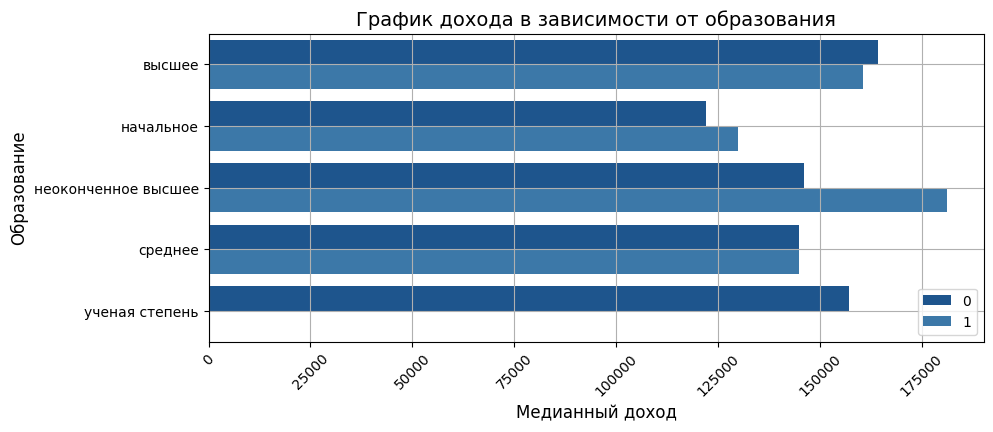

In [ ]:
# группируем данные по образованию и задолженности и считаем медианный доход
data_ed = df.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()

# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x=data_ed['total_income'],y=data_ed['education'],hue=data_ed['debt'])


# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования', fontsize=14)
plt.xlabel('Медианный доход', fontsize=12)
plt.ylabel('Образование', fontsize=12)
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще

**Связь между целью кредитования и задолженностью**

In [ ]:
# Применим функцию get_share к столбцу purpose_category
get_share(df,'purpose_category')

,purpose_category,total_users,debts,debt_share,users_share
0,операции с автомобилем,4279,400,9.3%,20.1%
1,операции с недвижимостью,10750,780,7.3%,50.4%
2,получение образования,3988,369,9.3%,18.7%
3,проведение свадьбы,2313,183,7.9%,10.8%


Наибольшее количество кредитов выдано для проведения различных операций с недвижимостью. Доля возврата кредита в срок для всех категорий примерно одинаковая. Поэтому нельзя говорить о том, что разные цели кредита влияют на его возврат в срок.

## Шаг 4. Общий вывод

Датасет представляет собой статистику о платёжеспособности клиентов.

Число выданных кредитов для заемщиков без детей составляет 14090, из которых 1063 имеют просрочку. Доля невозврата кредита для заемщиков без детей составляет 7.5%. Для заемщиков с одним ребенком - 9.2%, с двумя детьми - 9.5%, с тремя детьми - 8.2%, для заемщиков с 4-мя детьми доля невозврата составила 9.8%. Можно сказать, что количество детей не влияет на возврат кредита в срок.

Наибольшее количество кредитов выдано для проведения различных операций с недвижимостью. Доля возврата кредита в срок для всех категорий примерно одинаковая. Поэтому нельзя говорить о том, что разные цели кредита влияют на его возврат в срок.

Наибольшее количество кредитов выдано женатым/замужним заемщикам. Доля возврата кредита в срок для всех категорий примерно одинаковая.

Для заемщиков в статусе вдова/вдовец доля возврата кредита в срок наибольшая, хотя кредитов таким заемщикам выдано наименьшее количество.
Наименьшую долю возврата кредита в срок имеют заемщики в статусе гражданский брак и Не женат / не замужем).
Поэтому можно сказать, что наименее ответвенными заемщиками можно считать заемщиков, состоящих в гражданском браке, или не женатых/ не замужних.


Наибольшее количество кредитов выдано заемщикам со средним доходом от 50001 до 200000 (категория С). Доля невозврата кредита в срок для этой категории составила 8.5%. Для заемщиков с высоким доходом 1000001 и выше (категория E)  выдано всего 25 кредитов и только 2 не возвращены в срок. Для заемщиков с доходами от 30001 до 50000 (категория D) доля возврата кредита в срок самая высокая и составляет 94.0%. Тем не менее, можно сказать, что наименее ответвенными заемщиками можно считать заемщиков с доходами ниже 300000.

